# OpenCV 2장 영상 및 비디오 입출력

In [15]:
import cv2
import pafy
from matplotlib import pyplot as plt
%matplotlib inline

./ 는 자신 <br>
../ 는 부모 디렉토리 의미

In [2]:
imageFile='./creamheroes/chuchu.jpg'

cv2.IMREAD_COLOR (default)<br>
cv2.IMREAD_GRAYSCALE <br>

0: 흑백 <br>
1: 컬러

In [3]:
img_color = cv2.imread(imageFile) 
img_gray = cv2.imread(imageFile, 0)

In [4]:
cv2.imshow('cute_chuchu', img_color) # 윈도우 이름, 사진

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
print(img_color.shape)

(720, 1152, 3)


jpg: cv2.IMWRITE_JPEG_QUALITY : range [0, 100] <br>
png: cv2.IMWRITE_PNG_COMPRESSION : range [0, 9]<br>

imwrite : 저장 <br>
imshow : 보여주기

In [7]:
cv2.imwrite('../data/chuchu_grayscale.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 100])

cv2.imshow('Chuchu', img_gray) 
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
imgBGR = cv2.imread(imageFile)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

### RGB 채널순

<function matplotlib.pyplot.show(*args, **kw)>

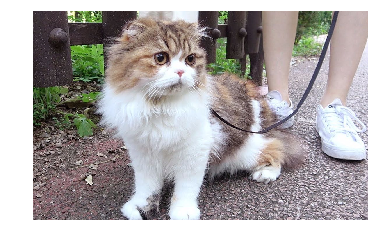

In [15]:
plt.axis('off')
plt.imshow(imgRGB)
plt.show

### BGR 채널순

<function matplotlib.pyplot.show(*args, **kw)>

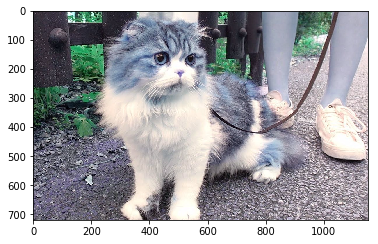

In [16]:
plt.imshow(imgBGR)
plt.show

cmap : cmap 의 속성을 gray로 저장해 줄 경우에만 GRAYSCALE 로 출력 가능<br>
interpolation : 중간색을 색칠하는 속성

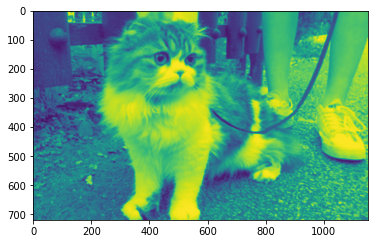

In [23]:
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)
## cmap을 gray로 저장하지 않은 경우
plt.imshow(imgGray, interpolation='bicubic')

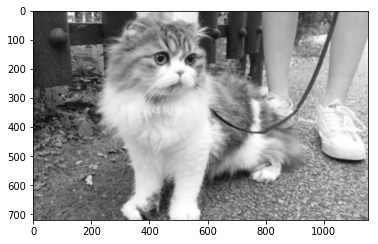

In [21]:
## cmap을 gray로 저장한 경우
plt.imshow(imgGray,cmap = 'gray', interpolation='bicubic')

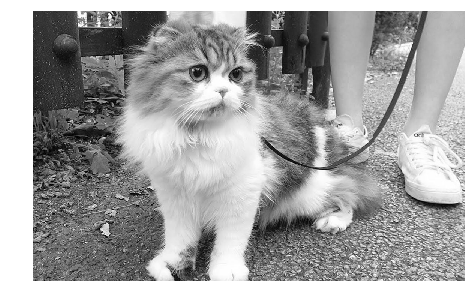

In [31]:
plt.figure(figsize = (6, 6)) # 크기를 (6인치, 6인치)로 설정
plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
plt.imshow(imgGray, cmap = 'gray')
plt.axis('off')
#plt.savefig('./creamheroes/plt_chuchu.png')
plt.show()

플롯 안의 작은 플롯들 = subplot <br>
(2, 2) 배치 <br>
전체 figsize = (10, 10) <br>
ax = 플롯들의 배열들이 저장  <br>

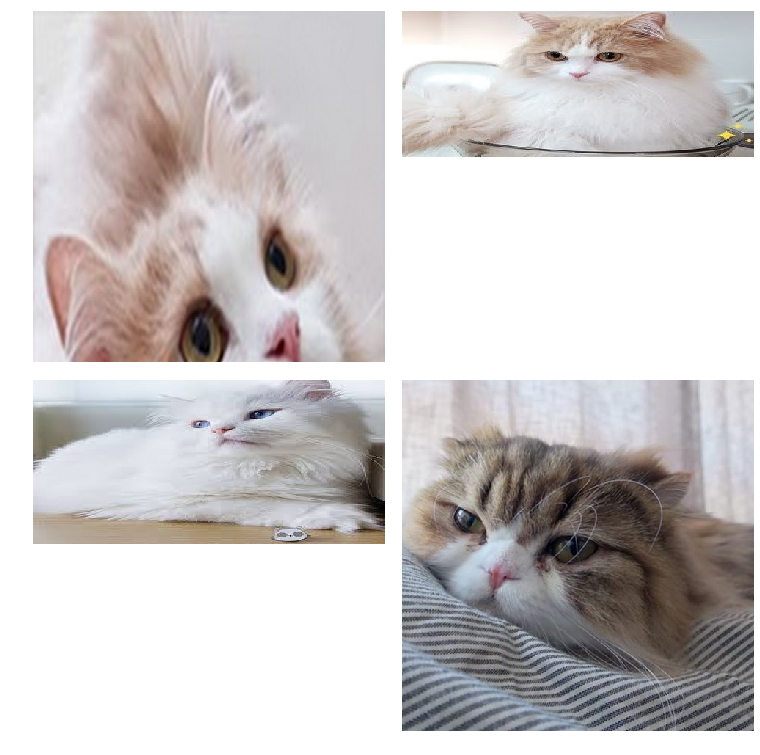

In [16]:
path = './creamheroes/'    # 영상 파일이 저장된 폴더(path)

imgBGR1 = cv2.imread(path+'didi2.jpg')
imgBGR2 = cv2.imread(path+'didi.jpg')
imgBGR3 = cv2.imread(path+'coco.jpg')
imgBGR4 = cv2.imread(path+'chuchu2.jpg')

imgRGB1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgRGB4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey=True)
fig.canvas.set_window_title('cream cats')

ax[0][0].axis('off')
ax[0][0].imshow(imgRGB1, aspect = 'auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgRGB2, aspect = 'auto')

ax[1][0].axis("off")
ax[1][0].imshow(imgRGB3, aspect = "auto")

ax[1][1].axis("off")
ax[1][1].imshow(imgRGB4, aspect = 'auto')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.05, hspace=0.05)
plt.savefig("./creamheroes/four_cats.png", bbox_inches='tight')
plt.show()

## 동영상 처리의 기본

In [4]:
cap = cv2.VideoCapture(r'C:\Users\seyoung\Downloads\vtest.avi')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=', frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    cv2.imshow('frame', frame)
    
    key = cv2.waitKey(25)
    if key == 27: #esc
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

frame_size= (768, 576)


##  pafy 라이브러리를 활용한 유튜브 영상 처리

In [6]:
url = 'https://www.youtube.com/watch?v=sDtTLWKSYUQ'
# 크림히어로즈 동영상 url 
video = pafy.new(url)

In [7]:
print('title = ', video.title) # title =  고양이 진짜 어디까지 들어갈 수 있을까?
print('video.rating = ', video.rating) # video.rating =  None
print('video.duration = ', video.duration) # video.duration =  00:07:52
best = video.getbest(preftype='webm') # 'mp4','3gp'
print('best.resolution', best.resolution) # best.resolution 640x360

title =  고양이 진짜 어디까지 들어갈 수 있을까?
video.rating =  None
video.duration =  00:07:52
best.resolution 640x360


In [14]:
cap=cv2.VideoCapture(best.url)

while True:
    retval, frame = cap.read()
    if not retval:
        break
    #frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #동영상 흑백처리
    cv2.imshow('frame', frame)
    
    key = cv2.waitKey(25)
    if key == 27: #esc
        break
        
cv2.destroyAllWindows()